In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import warnings
from scipy.signal import find_peaks
warnings.filterwarnings('ignore')

# SATE

Text(0, 0.5, 'yout')

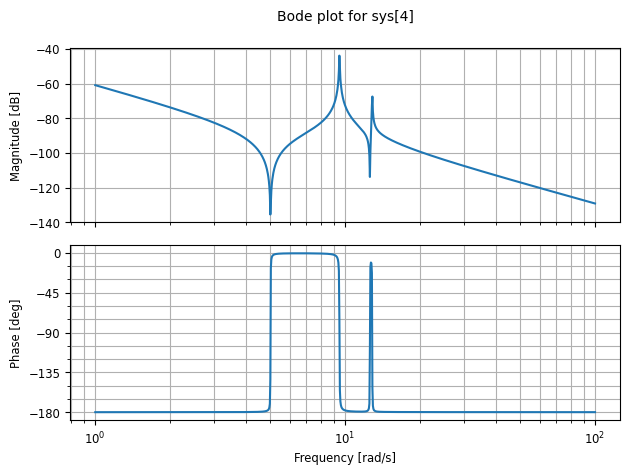

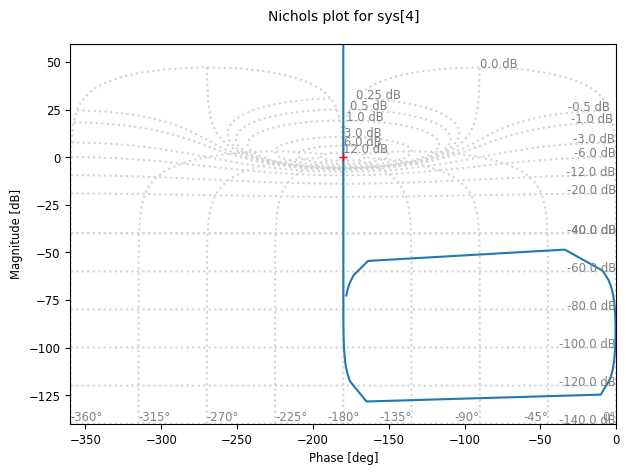

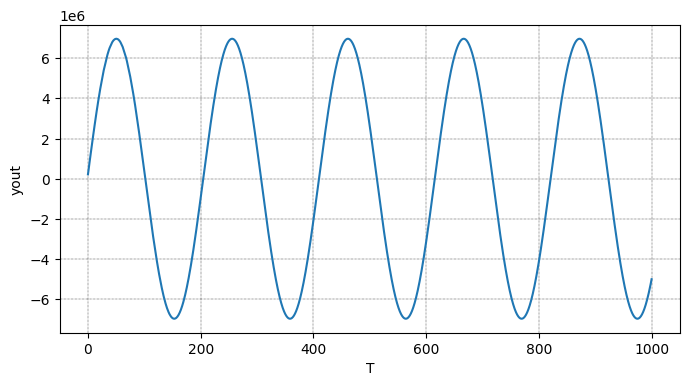

In [2]:
Is = 1069
ns = 1
ds = np.array([Is, 0, 0])

tfS = ct.tf(ns,ds)

# Modo elastico de antena 

I0 = 1025
f1 = 2.0
psi1 = 0.001

w1 = 2*np.pi*f1
psi1m = psi1*np.sqrt(Is/I0)
w1m = w1*np.sqrt(Is/I0)

n1 = Is/I0*np.array([1, 2*psi1*w1,   w1*w1])
d1 = np.array([1, 2*psi1m*w1m, w1m*w1m])
 
# Modo elastico de los paneles solares
 
I0 =300
f2 = 0.8
psi2 = 0.001

w2 = 2*np.pi*f2
psi2m = psi2*np.sqrt(Is/I0)
w2m = w2*np.sqrt(Is/I0)

n2 = Is/I0*np.array([1, 2*psi2*w2, w2*w2])
d2 = np.array([1, 2*psi2m*w2m, w2m*w2m])

tf1 = ct.tf(n1,d1)
tf2 = ct.tf(n2,d2)


sys = tf1*tf2*tfS
sysCL = sys/(1+sys)

mag,phase,omega =  ct.bode(sys,plot=True,Hz=False,dB=True,deg=True)

ct.nichols(sys,[0.001,10])

T, yout = ct.step_response(sysCL,1000,1)
plt.figure(figsize=(8,4))
plt.plot(T,yout)
plt.grid(color='k', ls = '-.', lw = 0.25)
plt.xlabel("T")
plt.ylabel("yout")

# CONT

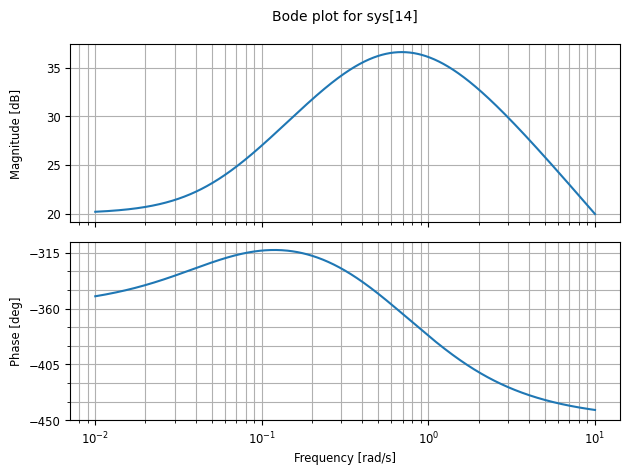

In [3]:
Is = 1069
k = 1.*10
psi = 1.0

Wn = np.sqrt ( k/Is )
kd = 2*psi*Wn*Is
Td = kd/k

nc = np.array([k*Td, k])
dc = np.array([Td/10, 1])

tfC = ct.tf(nc,dc)

Tdelay = 1
ndelay = 1
ddelay = np.array([Tdelay, 1])

tfDelay = ct.tf(ndelay, ddelay)


sys = tfC*tfDelay
sysCL = sys/(1+sys)

ct.bode(sys,Hz=False,dB=True,deg=True)

# FILT

In [4]:
from scipy.signal import ellip, butter

(np.float64(1.041276066342287), inf, np.float64(1.4000506631382332), nan)
(inf, inf, nan, nan)
(inf, inf, nan, nan)


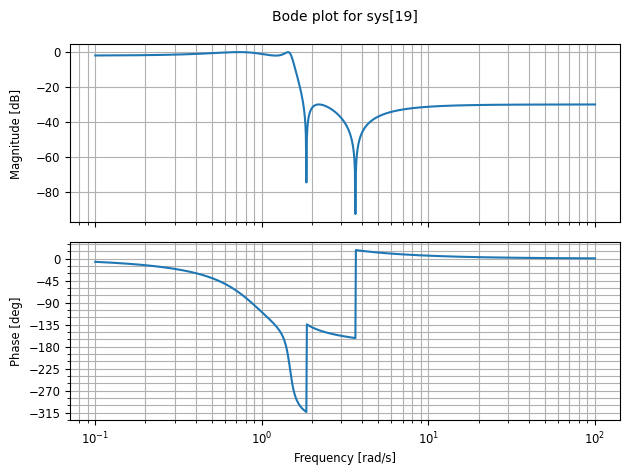

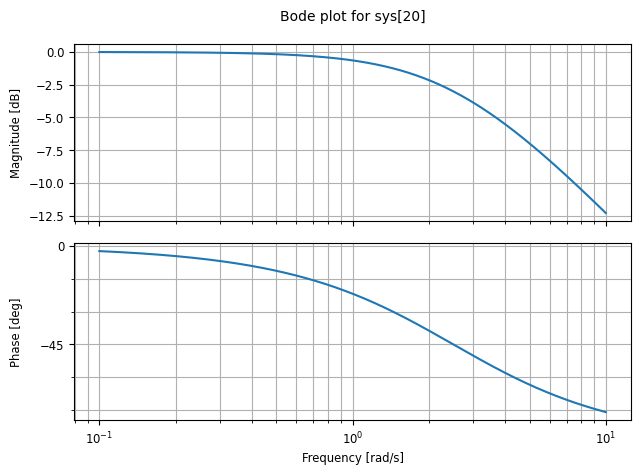

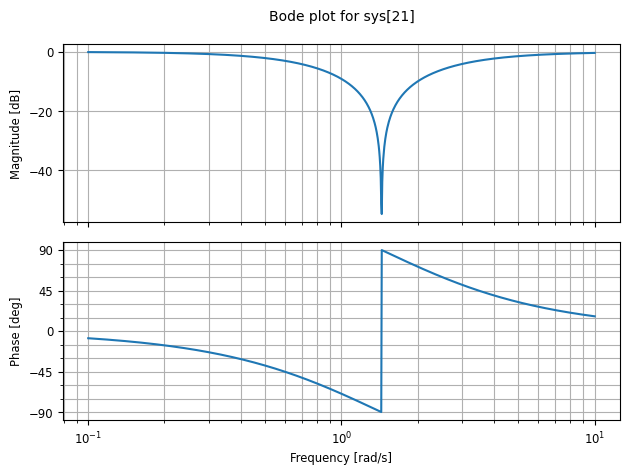

In [5]:
N1,D1 = ellip(4,2.,30,1.5,'low',analog=True)
sys_F1 = ct.tf(N1,D1)

N2,D2 = butter(1,2.5,'low',analog=True)
sys_F2 = ct.tf(N2,D2)

# Filtro NOTCH
wc = 1.44
psiz = 0.
psip = 1.
sys_F3=ct.tf([1, 2*psiz*wc, wc**2],[1, 2*psip*wc, wc**2])

plt.figure()
ct.bode(sys_F1,Hz=False,dB=True,deg=True)
print(ct.margin(sys_F1))
plt.figure()
ct.bode(sys_F2,Hz=False,dB=True,deg=True)
print(ct.margin(sys_F2))
plt.figure()
ct.bode(sys_F3,Hz=False,dB=True,deg=True)
print(ct.margin(sys_F3))

# Todo Junto

Text(0, 0.5, 'yout')

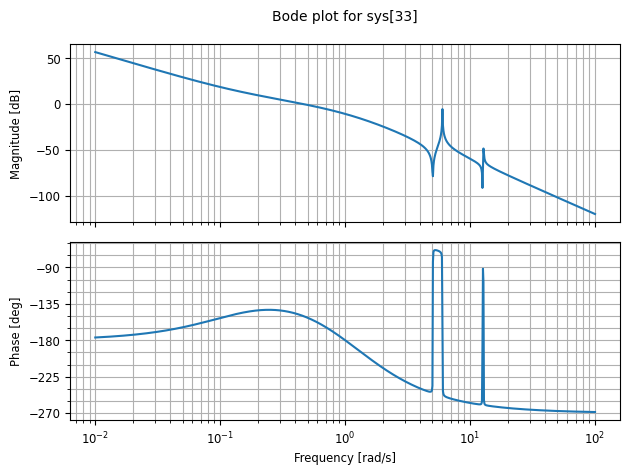

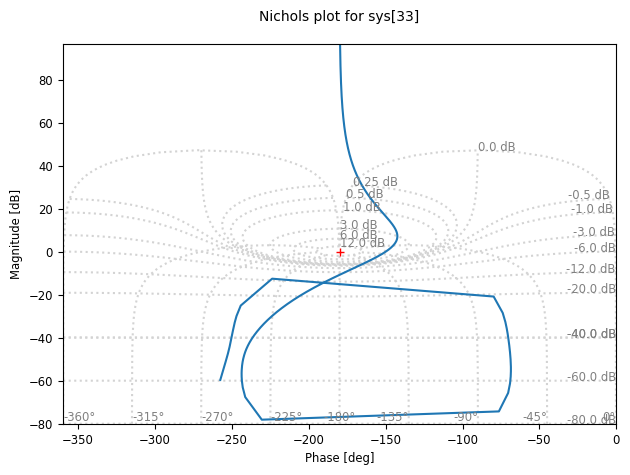

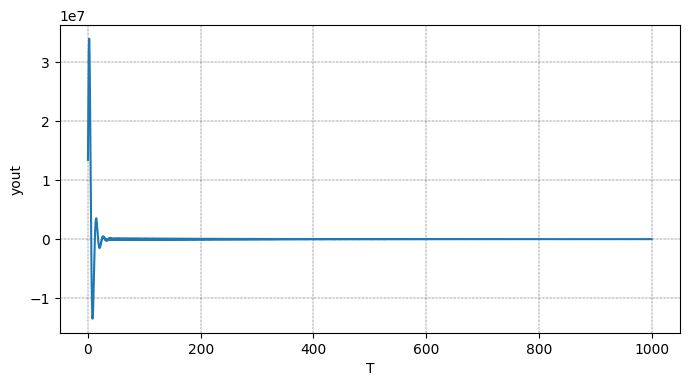

In [6]:
FLEX = True
FILTRO = False
DELAY = True

# Satelite 

Is = 1069
ns = 1
ds = np.array([Is, 0, 0])

tfS = ct.tf(ns,ds)

sys = tfS

# La proporcion de Inercia aportada por el apendice flexible se regulara con la 
# constante rmi (i=1,2,...)
# rmi = Inercia del Apendice flexible / Inercia total del satelite = Ia/Is
# Por otro lado para calcular la frecuencia modal ( denominador de la funcion de 
# transferencia ) se necesitan Is y I0=Is-Ia
# I0=Is-Ia=Is-rmi*Is=Is*(1-rmi)

# Modo elastico de antena

rm1 = 0.04
I0 = Is*(1-rm1)

f1 = 2.0
psi1 = 0.001
w1 = 2*np.pi*f1
        
psi1m = psi1*np.sqrt(Is/I0)
w1m = w1*np.sqrt(Is/I0)

n1 = Is/I0*np.array([1, 2*psi1*w1, w1*w1])
d1 = np.array([1, 2*psi1m*w1m, w1m*w1m])

tf1 = ct.tf(n1,d1) 

if True:
    sys = sys * tf1
    
# Modo elastico de los paneles solares

rm2 = 0.3          # Variar relacion de inercias rm2 entre (0.1 y 0.5)
I0 = Is*(1-rm2)

f2 = 0.8            # Variar frecuencia de cantilever entre (0.1 y 1.0)
psi2 = 0.001

w2 = 2*np.pi*f2
psi2m = psi2*np.sqrt(Is/I0)
w2m = w2*np.sqrt(Is/I0)

n2 = Is/I0*np.array([1, 2*psi2*w2, w2*w2])
d2 = np.array([1, 2*psi2m*w2m, w2m*w2m])

tf2 = ct.tf(n2,d2) 

if FLEX:
    sys = sys * tf2

# LEAD-LAG

k = 72.2        # Encontrar la ganancia k más grande que cumpla con los 
                # requerimientos para cada rm2 y f2
psi = 1.
Wn = np.sqrt ( k/Is )
kd = 2*psi*Wn*Is
Td = kd/k

nc = np.array([k*Td, k])
dc = np.array([Td/10, 1])

tfC = ct.tf(nc,dc)
sys = sys * tfC

# Delay

Tdelay = 1
ndelay = 1
ddelay = np.array([Tdelay, 1])

tfDelay = ct.tf(ndelay,ddelay)

if DELAY:
    sys = sys*tfDelay

# Filtro

[N1,D1] = ellip(6,2.,10,1.5,'low',analog=True)
sys_F1 = ct.tf(N1,D1)

if FILTRO:
    sys = sys*sys_F1

sysCL=sys/(1+sys)


# Analisis

mag,phase,omega = ct.bode(sys,plot=True,Hz=False,dB=True,deg=True)
ct.nichols(sys,[0.001,10])

T, yout = ct.step_response(sysCL,1000,.1)
plt.figure(figsize=(8,4))
plt.plot(T,yout)
plt.grid(color='k', ls = '-.', lw = 0.25)
plt.xlabel("T")
plt.ylabel("yout")

Margen de fase en grados:  30.0876600711417
Atenuacion:  -15.888855312151158
Frecuencia crossover: 0.4588404126454759
Rm2:  0.3
f2:  0.775
k:  72


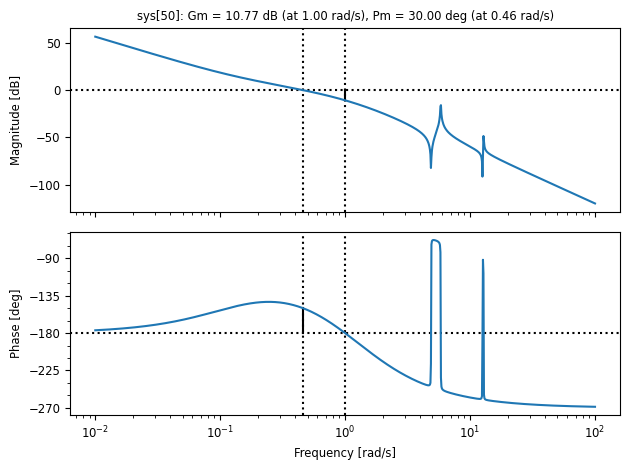

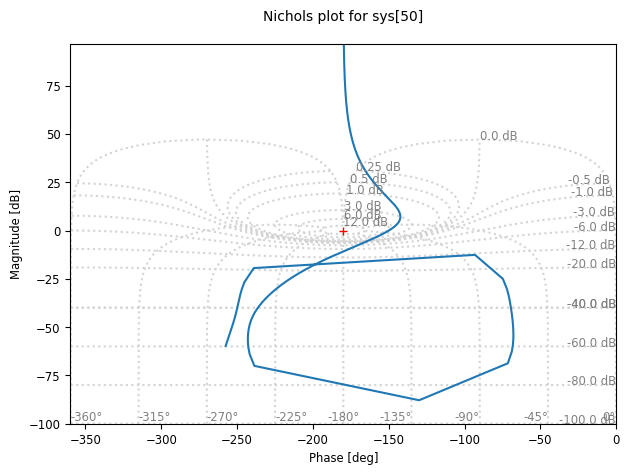

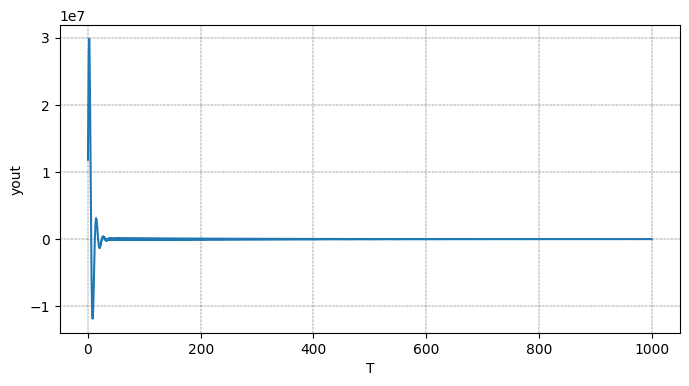

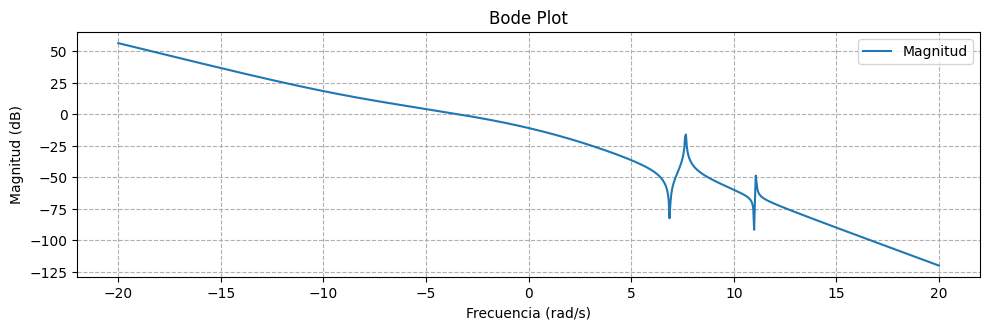

In [7]:
FLEX = True
FILTRO = False
DELAY = True

# Satelite 
Is = 1069
ns = 1
ds = np.array([Is, 0, 0])
tfS = ct.tf(ns,ds)
sys = tfS
rm1 = 0.04
I0 = Is*(1-rm1)

f1 = 2.0
psi1 = 0.001
w1 = 2*np.pi*f1
        
psi1m = psi1*np.sqrt(Is/I0)
w1m = w1*np.sqrt(Is/I0)

n1 = Is/I0*np.array([1, 2*psi1*w1, w1*w1])
d1 = np.array([1, 2*psi1m*w1m, w1m*w1m])

tf1 = ct.tf(n1,d1) 

if True:
    sys = sys * tf1
    
# Modo elastico de los paneles solares
rm2 = 0.3          # Variar relacion de inercias rm2 entre (0.1 y 0.5)
I0 = Is*(1-rm2)

f2 = 0.775            # Variar frecuencia de cantilever entre (0.1 y 1.0)
psi2 = 0.001

w2 = 2*np.pi*f2
psi2m = psi2*np.sqrt(Is/I0)
w2m = w2*np.sqrt(Is/I0)

n2 = Is/I0*np.array([1, 2*psi2*w2, w2*w2])
d2 = np.array([1, 2*psi2m*w2m, w2m*w2m])
tf2 = ct.tf(n2,d2)

if FLEX:
    sys = sys * tf2

# LEAD-LAG

k = 72        # Encontrar la ganancia k más grande que cumpla con los 
                # requerimientos para cada rm2 y f2
psi = 1.
Wn = np.sqrt ( k/Is )
kd = 2*psi*Wn*Is
Td = kd/k

nc = np.array([k*Td, k])
dc = np.array([Td/10, 1])

tfC = ct.tf(nc,dc)
sys = sys * tfC

# Delay

Tdelay = 1
ndelay = 1
ddelay = np.array([Tdelay, 1])

tfDelay = ct.tf(ndelay,ddelay)

if DELAY:
    sys = sys*tfDelay

# Filtro

[N1,D1] = ellip(6,2.,10,1.5,'low',analog=True)
sys_F1 = ct.tf(N1,D1)

if FILTRO:
    sys = sys*sys_F1

sysCL=sys/(1+sys)


# Analisis
mag,phase,omega = ct.bode(sys,plot=True,Hz=False,dB=True,deg=True, margins=True)
ct.nichols(sys,[0.001,10])

T, yout = ct.step_response(sysCL,1000,.1)
plt.figure(figsize=(8,4))
plt.plot(T,yout)
plt.grid(color='k', ls = '-.', lw = 0.25)
plt.xlabel("T")
plt.ylabel("yout")




peaks, _ = find_peaks(mag)



print("Margen de fase en grados: ", 180+(180/np.pi)*phase[np.argmin(np.abs(mag - 1))])
print("Atenuacion: ", 20*np.log10(mag[peaks[0]]))
print("Frecuencia crossover:", omega[np.argmin(np.abs(mag - 1))])
print("Rm2: ", rm2)
print("f2: ", f2)
print("k: ", k)

# Graficar el Bode plot y los picos
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(10*np.log10(omega), 20*np.log10(mag), label='Magnitud')
#plt.loglog(omega[peaks], mag[peaks], 'rx', label='Picos')
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.title('Bode Plot')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.show()



In [8]:
sysPrima = sys
def getParameters(rm2, f2):
    k = 0.1
    margenFase = 100
    atenuacion = -100
    margenFasePrev = margenFase
    atenuacionPrev = atenuacion
    kPrev = k

    while(margenFase > 30 and atenuacion < -6):
        FLEX = True
        FILTRO = False
        DELAY = True

        # Satelite 

        Is = 1069
        ns = 1
        ds = np.array([Is, 0, 0])

        tfS = ct.tf(ns,ds)

        sys = tfS

        # La proporcion de Inercia aportada por el apendice flexible se regulara con la 
        # constante rmi (i=1,2,...)
        # rmi = Inercia del Apendice flexible / Inercia total del satelite = Ia/Is
        # Por otro lado para calcular la frecuencia modal ( denominador de la funcion de 
        # transferencia ) se necesitan Is y I0=Is-Ia
        # I0=Is-Ia=Is-rmi*Is=Is*(1-rmi)

        # Modo elastico de antena

        rm1 = 0.04
        I0 = Is*(1-rm1)

        f1 = 2.0
        psi1 = 0.001
        w1 = 2*np.pi*f1
                
        psi1m = psi1*np.sqrt(Is/I0)
        w1m = w1*np.sqrt(Is/I0)

        n1 = Is/I0*np.array([1, 2*psi1*w1, w1*w1])
        d1 = np.array([1, 2*psi1m*w1m, w1m*w1m])

        tf1 = ct.tf(n1,d1) 

        if True:
            sys = sys * tf1
            
        # Modo elastico de los paneles solares

        #rm2 = 0.1          # Variar relacion de inercias rm2 entre (0.1 y 0.5)
        I0 = Is*(1-rm2)

        #f2 = 0.1            # Variar frecuencia de cantilever entre (0.1 y 1.0)
        psi2 = 0.001

        w2 = 2*np.pi*f2
        psi2m = psi2*np.sqrt(Is/I0)
        w2m = w2*np.sqrt(Is/I0)

        n2 = Is/I0*np.array([1, 2*psi2*w2, w2*w2])
        d2 = np.array([1, 2*psi2m*w2m, w2m*w2m])
        tf2 = ct.tf(n2,d2)

        if FLEX:
            sys = sys * tf2

        # LEAD-LAG

        #k = 2.1        # Encontrar la ganancia k más grande que cumpla con los 
                        # requerimientos para cada rm2 y f2
        psi = 1.
        Wn = np.sqrt ( k/Is )
        kd = 2*psi*Wn*Is
        Td = kd/k

        nc = np.array([k*Td, k])
        dc = np.array([Td/10, 1])

        tfC = ct.tf(nc,dc)
        sys = sys * tfC

        # Delay

        Tdelay = 1
        ndelay = 1
        ddelay = np.array([Tdelay, 1])

        tfDelay = ct.tf(ndelay,ddelay)

        if DELAY:
            sys = sys*tfDelay

        # Filtro

        sysCL=sys/(1+sys)
        
        mag,phase,omega = ct.bode(sys,plot=False,Hz=False,dB=True,deg=True, display_margins=True)

        peaks, _ = find_peaks(mag)
        
        primerPicoIndex = peaks[0]
        
        atenuacion = 20*np.log10(mag[primerPicoIndex])
        

        margenFase = 180+(180/np.pi)*phase[np.argmin(np.abs(mag - 1))]
        
        
        crossoverFreq = omega[np.argmin(np.abs(mag - 1))]
    
        if margenFase > 30 and atenuacion < -6:
            margenFasePrev = margenFase
            atenuacionPrev = atenuacion
            crossoverFreqPrev = crossoverFreq
            kPrev = k

        k = k+0.1
        
    
    return kPrev, margenFasePrev, atenuacionPrev, crossoverFreqPrev


# Define the range of values for rm2_ and f2_
rm2_values = np.linspace(0.1, 0.5, 5)  # Example range for rm2_
f2_values = np.linspace(0.1, 1.0, 5)  # Example range for f2_

# Initialize an empty list to store the results
results = []

# Loop through each combination of rm2_ and f2_
for rm2_ in rm2_values:
    for f2_ in f2_values:
        print(f"Calculating for rm2: {rm2_}, f2: {f2_}")
        k, margenFase, atenuacion, crossoverFreq = getParameters(rm2_, f2_)
        # Store the results in the list
        results.append([rm2_, f2_, k, margenFase, atenuacion,crossoverFreq])
        print(rm2_, f2_, k, margenFase, atenuacion,crossoverFreq)
# Convert the results list to a numpy array for easier manipulation
results_array = np.round(np.array(results),1)

# Guardame en un CSV los resultados tabulados
np.savetxt("resultsPunto1.csv", results_array, delimiter=",", header="rm2, f2, k, margenFase, atenuacion, crossoverFreq", comments="",fmt='%.2f')


Calculating for rm2: 0.1, f2: 0.1
0.1 0.1 2.1000000000000005 49.48579005171621 -6.008511197269485 0.0854932706626838
Calculating for rm2: 0.1, f2: 0.325
0.1 0.325 37.000000000000256 35.741578602260034 -6.016705550388402 0.34161232685855286
Calculating for rm2: 0.1, f2: 0.55
0.1 0.55 72.00000000000018 30.087658615050856 -11.764173040848917 0.4588404126454759
Calculating for rm2: 0.1, f2: 0.775
0.1 0.775 71.90000000000019 30.085546099542086 -14.016081399929224 0.4588404126454759
Calculating for rm2: 0.1, f2: 1.0
0.1 1.0 71.90000000000019 30.085540856778124 -30.122562649941614 0.4588404126454759
Calculating for rm2: 0.2, f2: 0.1
0.2 0.1 0.7 51.577771661014566 -6.8947827389292025 0.04916903577628029
Calculating for rm2: 0.2, f2: 0.325
0.2 0.325 6.5999999999999925 45.86155014033568 -6.096700407478584 0.15037553212997376
Calculating for rm2: 0.2, f2: 0.55
0.2 0.55 38.80000000000028 35.43695045928058 -6.021486672431255 0.34796979038876913
Calculating for rm2: 0.2, f2: 0.775
0.2 0.775 72.00000

PROBADORRRR

(array([691, 776]), {})
-15.865322001550595


Text(0, 0.5, 'yout')

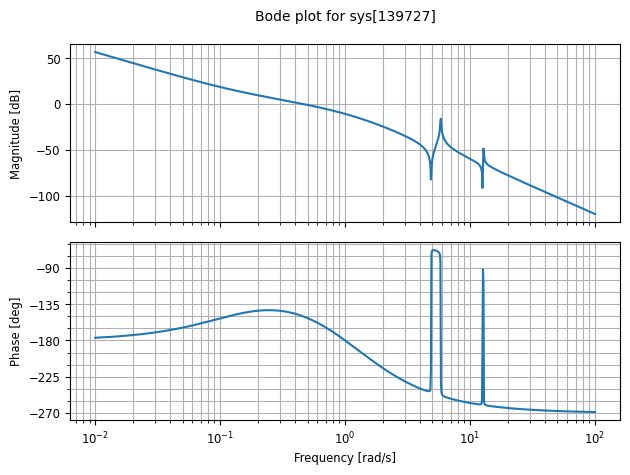

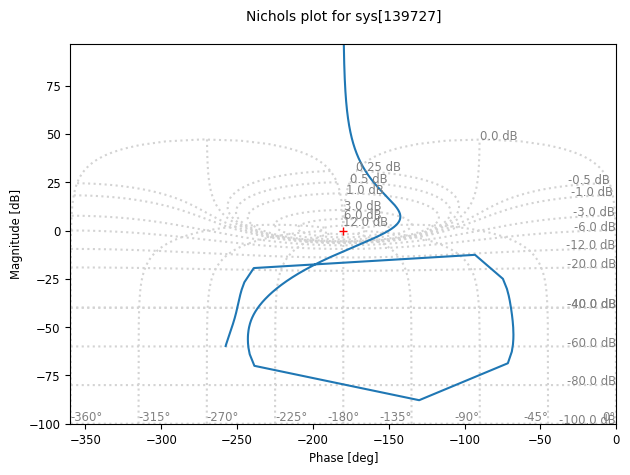

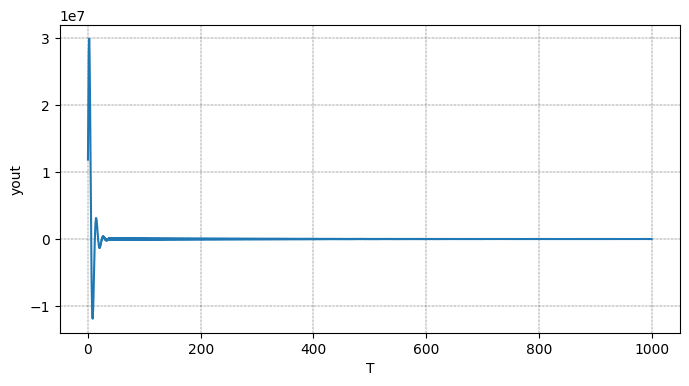

In [9]:
FLEX = True
FILTRO = False
DELAY = True

# Satelite 

Is = 1069
ns = 1
ds = np.array([Is, 0, 0])

tfS = ct.tf(ns,ds)

sys = tfS

# La proporcion de Inercia aportada por el apendice flexible se regulara con la 
# constante rmi (i=1,2,...)
# rmi = Inercia del Apendice flexible / Inercia total del satelite = Ia/Is
# Por otro lado para calcular la frecuencia modal ( denominador de la funcion de 
# transferencia ) se necesitan Is y I0=Is-Ia
# I0=Is-Ia=Is-rmi*Is=Is*(1-rmi)

# Modo elastico de antena

rm1 = 0.04
I0 = Is*(1-rm1)

f1 = 2.0
psi1 = 0.001
w1 = 2*np.pi*f1
        
psi1m = psi1*np.sqrt(Is/I0)
w1m = w1*np.sqrt(Is/I0)

n1 = Is/I0*np.array([1, 2*psi1*w1, w1*w1])
d1 = np.array([1, 2*psi1m*w1m, w1m*w1m])

tf1 = ct.tf(n1,d1) 

if True:
    sys = sys * tf1
    
# Modo elastico de los paneles solares

rm2 = 0.3          # Variar relacion de inercias rm2 entre (0.1 y 0.5)
I0 = Is*(1-rm2)

f2 = 0.775            # Variar frecuencia de cantilever entre (0.1 y 1.0)
psi2 = 0.001

w2 = 2*np.pi*f2
psi2m = psi2*np.sqrt(Is/I0)
w2m = w2*np.sqrt(Is/I0)

n2 = Is/I0*np.array([1, 2*psi2*w2, w2*w2])
d2 = np.array([1, 2*psi2m*w2m, w2m*w2m])
tf2 = ct.tf(n2,d2)

if FLEX:
    sys = sys * tf2

# LEAD-LAG

k = 72.2       # Encontrar la ganancia k más grande que cumpla con los 
                # requerimientos para cada rm2 y f2
psi = 1.
Wn = np.sqrt ( k/Is )
kd = 2*psi*Wn*Is
Td = kd/k

nc = np.array([k*Td, k])
dc = np.array([Td/10, 1])

tfC = ct.tf(nc,dc)
sys = sys * tfC

# Delay

Tdelay = 1
ndelay = 1
ddelay = np.array([Tdelay, 1])

tfDelay = ct.tf(ndelay,ddelay)

if DELAY:
    sys = sys*tfDelay

sysCL = sys/(1+sys)
mag,phase,omega = ct.bode(sys,plot=True,Hz=False,dB=True,deg=True)

ct.nichols(sys,[0.001,10])

print(find_peaks(mag))

print(20*np.log10(mag[691]))


T, yout = ct.step_response(sysCL,1000,.1)
plt.figure(figsize=(8,4))
plt.plot(T,yout)
plt.grid(color='k', ls = '-.', lw = 0.25)
plt.xlabel("T")
plt.ylabel("yout")
